Add occlusions to dataset

In [1]:
import os

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# matplotlib.use( 'tkagg' )
plt.style.use('ggplot')
matplotlib.use( 'tkagg' )
%matplotlib inline
from os import listdir
from os.path import isfile, join

In [2]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

In [3]:
dataDir='/home/elisabeth/Desktop/COCOdataset2017'
dataType='val'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)


loading annotations into memory...
Done (t=2.62s)
creating index...
index created!
[{'supercategory': 'textile', 'id': 92, 'name': 'banner'}, {'supercategory': 'textile', 'id': 93, 'name': 'blanket'}, {'supercategory': 'plant', 'id': 94, 'name': 'branch'}, {'supercategory': 'building', 'id': 95, 'name': 'bridge'}, {'supercategory': 'building', 'id': 96, 'name': 'building-other'}, {'supercategory': 'plant', 'id': 97, 'name': 'bush'}, {'supercategory': 'furniture-stuff', 'id': 98, 'name': 'cabinet'}, {'supercategory': 'structural', 'id': 99, 'name': 'cage'}, {'supercategory': 'raw-material', 'id': 100, 'name': 'cardboard'}, {'supercategory': 'floor', 'id': 101, 'name': 'carpet'}, {'supercategory': 'ceiling', 'id': 102, 'name': 'ceiling-other'}, {'supercategory': 'ceiling', 'id': 103, 'name': 'ceiling-tile'}, {'supercategory': 'textile', 'id': 104, 'name': 'cloth'}, {'supercategory': 'textile', 'id': 105, 'name': 'clothes'}, {'supercategory': 'sky', 'id': 106, 'name': 'clouds'}, {'superca

In [4]:
print('The class name is', getClassName(166, cats))


The class name is tent


In [5]:
filterClasses = ['flower', 'mountain']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 2


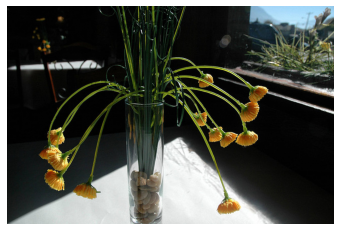

In [6]:
# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

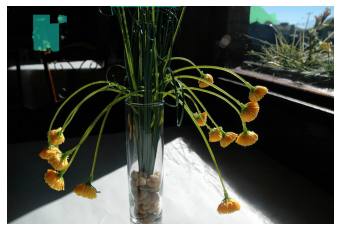

In [7]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
########## ALl POSSIBLE COMBINATIONS ########
classes = ['flower', 'vegetable', 'fruit', 'rock', 'bridge','stairs','clothes']
catIds = [98,117,119,170]

images = []
imgIds=[]
catIdss = []
if classes!=None:
    # iterate for each individual class in the list
    for catId in catIds:
        # get all images containing given class
        # catIds += coco.getCatIds(catNms=[className])
        print(catIDs)
        catIdss.append(catId)
        imgIds += coco.getImgIds(catIds=catId)
        print(imgIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)
print(catIdss)
print("Number of images containing the filter classes:", dataset_size)

[92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
[357888, 453634, 329219, 245764, 30213, 47112, 435208, 221708, 168974, 180751, 31248, 293390, 397327, 458768, 547854, 546325, 565776, 40471, 146457, 262682, 429598, 545826, 331817, 397354, 494634, 460333, 159791, 236592, 485424, 577584, 446005, 34873, 569917, 16958, 147518, 31296, 308799, 330818, 407614, 491071, 6213, 579655, 520264, 554579, 15956, 226903, 570456, 327769, 268378, 357978, 215644, 213086, 211042, 186980, 482917, 472678, 561256, 470121, 481386, 73326, 234607, 350833, 23666, 7795, 169076, 287347, 156278, 360564, 476787, 166521, 

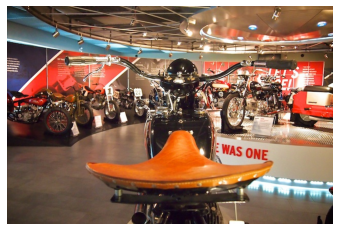

In [9]:
# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

[92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
clothes
117


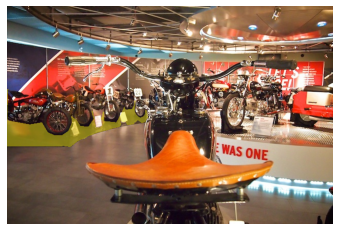

In [10]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
print(catIDs)
print(getClassName(105,cats))
for catId in catIdss:   
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=[catId], iscrowd=None)
    if(annIds):
        print(catId)
        anns = coco.loadAnns(annIds)
        coco.showAnns(anns)

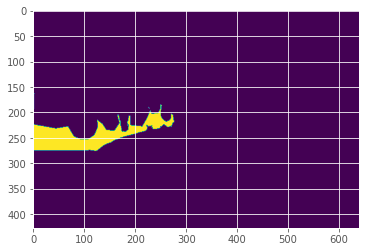

In [11]:
#### GENERATE A BINARY MASK ####
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)

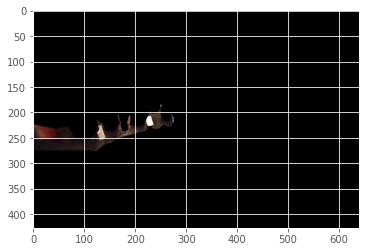

In [12]:
mask = np.uint8(mask)
masked = cv2.bitwise_and(I,I,mask = mask)
plt.imshow(masked)



In [85]:
# load and display a random image
def createMaskedOcclusionImage():



Get an image from my dataset

In [17]:
labels_directory = "/home/elisabeth/data/teoDataset11Objects/new_labels/"
images_directory = "/home/elisabeth/data/teoDataset11Objects/images/"
new_images_directory = "/home/elisabeth/data/teoDataset11Objects/new_images/"
new_labels_oclussion = "/home/elisabeth/data/teoDataset11Objects/new_labels_oclussion/"

def addOcclusionImage(f, masked, new_f):

    print(f)
    x = 0
    y = 0
    w = 0
    h = 0     
    with open(labels_directory+f+'.txt', "r+")  as fp:
        cnt = 0
        label = 0

        for r in fp.read().split(' '):
            if cnt == 0:
                label = int(r)
            if cnt ==1:
                x = float(r)
            if cnt == 2:
                y = float(r)
            if cnt ==3:
                w = float(r)
            if cnt == 4:
                h = float(r)
            cnt += 1
        print(label, x, y, w, h)

        

    img_dataset = io.imread(images_directory+f+'.jpg')
    print(img_dataset.shape)
    l=int((x-w/2.0)*img_dataset.shape[1])
    r=int((x+w/2.0)*img_dataset.shape[1])
    t=int((y-h/2.0)*img_dataset.shape[0])
    b=int((y+h/2.0)*img_dataset.shape[0])
    print(l,t, b,r)

    # plt.imshow(img_dataset)

    while masked.shape[1]>= img_dataset.shape[1] or masked.shape[0]>= img_dataset.shape[0]:
        scale_percent = 80 # percent of original size
        width = int(masked.shape[1] * scale_percent / 100)
        height = int(masked.shape[0] * scale_percent / 100)
        dim = (width, height)
        
        # resize image
        masked = cv2.resize(masked, dim, interpolation = cv2.INTER_AREA)
        # resized = np.float32(resized)
    
        print(masked.shape)
    resized = np.uint8(masked*255.0)
    

 
    
    # print(resized.shape)

    rows,cols,channels = resized.shape
    roi = img_dataset[0:rows, 0:cols]
    # print(roi.shape)

    img2gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

    ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY)

    mask_inv = cv2.bitwise_not(mask.astype('uint8'))
    

    mask_img_dataset = np.zeros((img_dataset.shape[0], img_dataset.shape[1], 3), np.uint8)
    color = (255,255,255)
   
    # Line thickness of -1 px
    # Thickness of -1 will fill the entire shape
    thickness = -1
   
    # Using cv2.rectangle() method
    # Draw a rectangle of black color of thickness -1 px
    mask_img_dataset = cv2.rectangle(mask_img_dataset, (l,t), (r,b), color, thickness)

    # print("mask")
    # plt.imshow(mask)
    # plt.show()
    # plt.imshow(mask_img_dataset)
    # plt.show()
    count_inside_bbox = 0
    max_count_inside_bbox = 2000
    break_now = False
    init_y = 0
    init_x = 0
    end_y = 0
    end_y_coco = 0
    end_x = 0
    end_x_coco = 0
    for init_y in range(0,img_dataset.shape[0],20):
        for init_x in range(0,img_dataset.shape[1],20):
            mask1 = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
            mask_img_coco_dataset = np.zeros((img_dataset.shape[0], img_dataset.shape[1], 3), np.uint8)
            aux_rows =  rows+init_y
            aux_cols = cols+init_x

            end_y = init_y+ rows
            end_y_coco = rows
            end_x = init_x + cols
            end_x_coco = init_x + cols
            
            if(aux_rows>img_dataset.shape[0]):
                outside_rows = aux_rows-img_dataset.shape[0]
                end_y = init_y+(rows-outside_rows)
                end_y_coco = rows-outside_rows
            if(aux_cols>img_dataset.shape[1]):
                outside_cols = aux_cols-img_dataset.shape[1]
                end_x = init_x+(cols-outside_cols)
                end_x_coco = cols-outside_cols
            
            mask_img_coco_dataset[init_y:end_y, init_x:end_x] = mask1[0:end_y_coco, 0:end_x_coco]
            
                              
            # plt.imshow(mask_img_coco_dataset)
            # plt.show()
            img_bwo = cv2.bitwise_and(mask_img_dataset,mask_img_coco_dataset)

            img_bwo = cv2.cvtColor(img_bwo, cv2.COLOR_RGB2GRAY)
            # print(img_bwo)
            # plt.imshow(img_bwo)
            # plt.show()
            # print("countNonZero:", cv2.countNonZero(img_bwo))
            count_inside_bbox =  cv2.countNonZero(img_bwo)
                   
            if(count_inside_bbox>max_count_inside_bbox and count_inside_bbox<2*max_count_inside_bbox) :
                break_now = True
                break
        if(break_now):
            break
        
    if(break_now):

        print("FOUND A GOOD ENOUGH OCCLUSION")
    
        # Put logo in ROI and modify the main image
        # print(mask_inv)
        rows,cols,channels = resized.shape
        roi = img_dataset[init_y:end_y, init_x:end_x]
        # print(roi.shape)
        # print(mask_inv.shape)
        img1_bg = cv2.bitwise_and(roi,roi.astype('uint8'),mask = mask_inv[0:end_y_coco, 0:end_x_coco].astype('uint8'))

        # Take only region of logo from logo image.

        img2_fg = cv2.bitwise_and(resized[0:end_y_coco, 0:end_x_coco],resized[0:end_y_coco, 0:end_x_coco],mask = mask[0:end_y_coco, 0:end_x_coco].astype('uint8'))
            
        dst = cv2.add(img1_bg,img2_fg.astype('uint8'))
        img_dataset[init_y:end_y, init_x:end_x] = dst
        # print(img1_bg.dtype)
        # print(img2_fg.dtype)
            
        # print(img_dataset.shape)
        # print(resized.shape)
        # plt.imshow(img_dataset)
        img_dataset = cv2.cvtColor(img_dataset, cv2.COLOR_BGR2RGB)
        cv2.imwrite(new_images_directory+new_f+'.jpg', img_dataset)
        
        
        new_labels_file  = open(new_labels_oclussion+new_f+'.txt', "w+")
        new_labels_file.write(str(label)+" "+str(x)+" "+str(y)+" " + str(w)+" "+str(h)+"\n")
        new_labels_file.close()

        return True
    else:
        return False
    #final = cv2.bitwise_or(blank_image, img_dataset)

    # for f in listdir(images_directory):
    #     print(f)

3810
1165
98
1165
2 0.813281 0.58125 0.257812 0.5125
(480, 640, 3)
438 156 402 602
(512, 378, 3)
(409, 302, 3)
3810
1165
170
1165
2 0.813281 0.58125 0.257812 0.5125
(480, 640, 3)
438 156 402 602
(384, 512, 3)
FOUND A GOOD ENOUGH OCCLUSION
ready
3811
240
98
240
0 0.84375 0.588542 0.3125 0.29375
(480, 640, 3)
440 212 353 640
(512, 384, 3)
(409, 307, 3)
FOUND A GOOD ENOUGH OCCLUSION
ready
3812
6176
98
117
6176
6 0.435937 0.753125 0.084375 0.239583
(480, 640, 3)
251 304 418 305
(384, 512, 3)
FOUND A GOOD ENOUGH OCCLUSION
ready
3813
8883
119
8883
9 0.889062 0.61875 0.221875 0.2625
(480, 640, 3)
497 234 360 639
(400, 276, 3)
FOUND A GOOD ENOUGH OCCLUSION
ready
3814
6815
119
6815
7 0.215625 0.776042 0.203125 0.289583
(480, 640, 3)
73 303 442 203
(384, 512, 3)
3814
6815
98
6815
7 0.215625 0.776042 0.203125 0.289583
(480, 640, 3)
73 303 442 203
(340, 512, 3)
FOUND A GOOD ENOUGH OCCLUSION
ready
3815
2455
98
2455
4 0.535156 0.605208 0.204687 0.197917
(480, 640, 3)
276 242 337 407
(384, 512, 3)
38

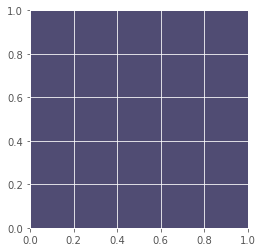

In [20]:
files = listdir(images_directory)
count_file = 3810
while count_file<4000:
    print(count_file)
    f = files[count_file]
    f = f[:-4]
    print(f)

    # load and display a random image
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

    # plt.axis('off')
    # plt.imshow(I)
    # plt.show()

    # # Load and display instance annotations
    # plt.imshow(I)
    # plt.axis('off')
    # print(catIDs)
    # print(getClassName(105,cats))
    for catId in catIdss:   
        annIds = coco.getAnnIds(imgIds=img['id'], catIds=[catId], iscrowd=None)
        if(annIds):
            print(catId)
            anns = coco.loadAnns(annIds)
            coco.showAnns(anns)
    #### GENERATE A BINARY MASK ####
    mask = np.zeros((img['height'],img['width']))
    for i in range(len(anns)):
        mask = np.maximum(coco.annToMask(anns[i]), mask)
    # plt.imshow(mask)

    mask = np.uint8(mask)
    masked = cv2.bitwise_and(I,I,mask = mask)
    # plt.imshow(masked)
    # plt.show()

    new_f = str(10722+count_file+1)
    if(addOcclusionImage(f, masked=masked, new_f=new_f)):
        count_file+=1
        print("ready")